# Bayesian Monthly Sensitivity Model

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import pystan

%matplotlib inline

In [2]:
maize_temp=pd.read_table('./Crop_data_files/maize_met_anoms/Maize_Spring_USA_Indiana_temp_anom_real.csv')
maize_temp.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)


In [3]:
maize_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1980,-0.056459,-4.047159,-2.891365,-1.662953,-0.011087,-1.239024,1.321953,1.644665,0.979485,-1.575452,-1.109620,-0.274330
1,1981,-2.111886,0.800694,-0.612761,2.194693,-2.059688,0.486604,-0.282903,-0.729500,-0.848437,-1.100794,0.458765,-1.711634
2,1982,-4.515895,-2.672947,-0.698143,-2.999736,2.619110,-2.636957,-0.060815,-1.617204,-0.965910,0.517162,0.689813,4.570556
3,1983,1.431649,1.888137,0.673156,-2.613061,-2.217918,-0.060842,1.810783,2.414731,0.510114,0.719891,1.167489,-5.882636
4,1984,-3.208510,3.154736,-4.808055,-1.424118,-1.971217,1.546517,-1.481964,0.268126,-0.622906,2.569339,-0.495399,3.574318
5,1985,-3.807982,-2.972269,1.756684,2.591861,1.094365,-1.431389,-0.500738,-1.092641,0.391139,1.622937,1.682124,-4.454212
6,1986,0.984898,-0.574060,1.332603,1.675776,0.550640,0.353754,1.006234,-1.860055,1.762083,0.642272,-1.720364,0.324295
7,1987,0.131578,1.771261,1.720144,-0.018394,2.889113,1.394066,0.723247,0.530004,0.460058,-2.951656,2.032478,1.757968
8,1988,-1.115174,-2.030498,0.164259,-0.390156,0.698295,1.006241,1.349142,2.134782,0.225120,-3.673672,0.251725,0.142092
9,1989,4.575519,-2.568745,0.559749,-1.155496,-1.813308,-0.453036,-0.017279,-0.691197,-1.173911,0.426275,-0.862689,-6.880979


In [10]:
# Compile model
sm=pystan.StanModel(file='BMSM-simp.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e7839d65b913f1005fc3976af2843100 NOW.


In [11]:
yields=pd.read_table('./Crop_data_files/Maize_median_yield_anoms.csv')

In [47]:
print(np.array(yields[yields['Region']=='Maize_Spring_USA_Indiana'].iloc[0,22:]))

[-0.75312 0.0 1.12968 -2.7614400000000003 -0.3138 0.06276 0.0 0.75312
 -2.8869599999999997 0.25104 0.0 -2.5104 0.9414 0.0 0.75312 -0.6276 0.0
 -0.06276 0.3138 -0.3138 0.56484 0.6276 -1.569 -0.50208 0.87864 0.0 0.0
 -0.18828 0.18828 0.87864 0.0 -0.6903600000000001 -3.64008 0.97278
 0.6903600000000001]


(array([ 1.,  2.,  1.,  0.,  1.,  0.,  6., 11.,  5.,  8.]),
 array([-3.64008 , -3.163104, -2.686128, -2.209152, -1.732176, -1.2552  ,
        -0.778224, -0.301248,  0.175728,  0.652704,  1.12968 ]),
 <a list of 10 Patch objects>)

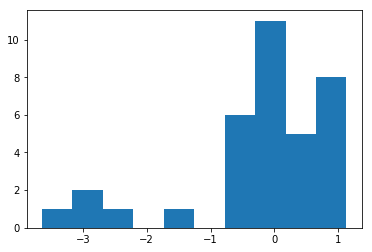

In [50]:
plt.hist(np.array(yields[yields['Region']=='Maize_Spring_USA_Indiana'].iloc[0,22:].astype(float)))

In [13]:
n_years=np.array(yields[yields['Region']=='Maize_Spring_USA_Indiana'].iloc[0,22:]).size
data={
    'n_regions':1,
    'n_years':n_years,
    'd_temp':np.array(maize_temp.iloc[:,1:]).reshape(1,n_years,12),
    'd_yields':np.array(yields[yields['Region']=='Maize_Spring_USA_Indiana'].iloc[0,22:]).astype(float).reshape(1,n_years)
}

In [14]:
fit=sm.sampling(data=data,chains=4,iter=1000,verbose=True)

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/pystan/misc.py:364: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
fit

Inference for Stan model: anon_model_e7839d65b913f1005fc3976af2843100.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
s_temp[0,0]           0.07  1.9e-3   0.08  -0.08   0.02   0.07   0.13   0.22   1618    1.0
s_temp[0,1]           -0.1  1.9e-3   0.08  -0.25  -0.15   -0.1  -0.05   0.05   1681    1.0
s_temp[0,2]          -0.18  2.0e-3   0.09  -0.36  -0.24  -0.18  -0.12-4.1e-3   2000    1.0
s_temp[0,3]           0.03  3.1e-3   0.14  -0.24  -0.07   0.02   0.12   0.29   2000    1.0
s_temp[0,4]           0.11  3.1e-3   0.11  -0.12   0.04   0.11   0.19   0.33   1345    1.0
s_temp[0,5]        -9.6e-3  5.3e-3    0.2  -0.39  -0.15  -0.01   0.13    0.4   1446    1.0
s_temp[0,6]           -0.4  3.3e-3   0.15  -0.69   -0.5   -0.4   -0.3   -0.1   2000    1.0
s_temp[0,7]          -0.33  4.7e-3   0.17  -0.66  -0.45  -0.33  -0.21  -0.01   1265  

In [16]:
# carry out some diagnostic checks on fit
from xidplus.stan_fit import stan_utility
stan_utility.check_div(fit)
stan_utility.check_energy(fit)
stan_utility.check_treedepth(fit)

/Users/pdh21/anaconda3/envs/new/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0.0 of 2000 iterations ended with a divergence (0.0%)
0 of 2000 iterations saturated the maximum tree depth of 10 (0.0%)


In [17]:
samples=fit.extract()

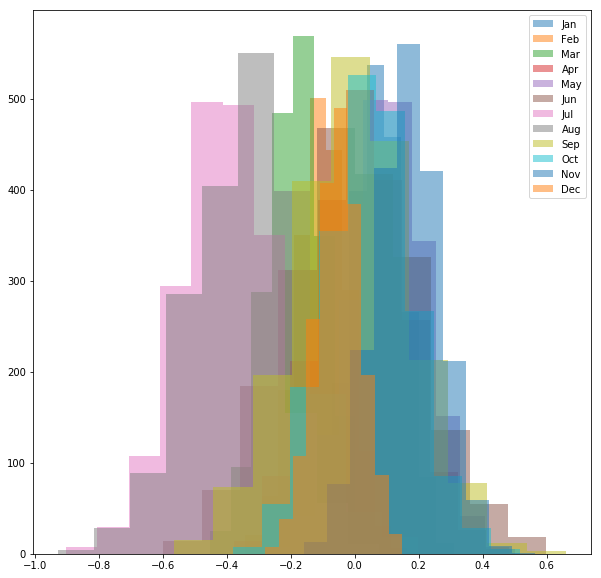

In [23]:
plt.figure(figsize=(10,10))
for i in range(0,12):
    plt.hist(samples['s_temp'][:,0,i], alpha=0.5,label=maize_temp.columns[1:][i])
plt.legend()

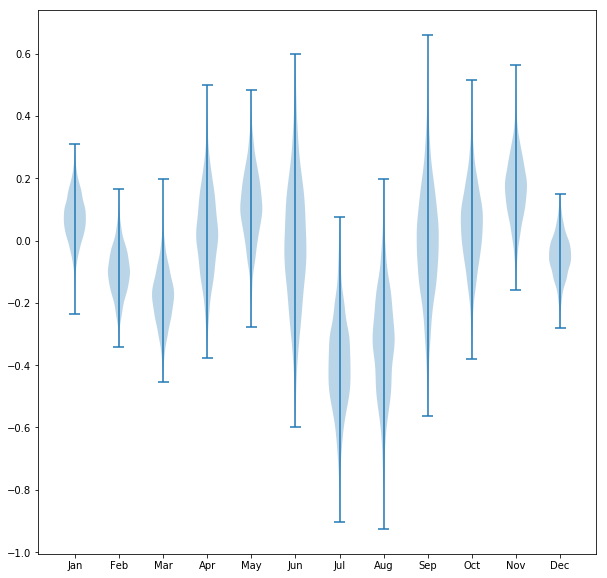

In [41]:
plt.figure(figsize=(10,10))
plt.violinplot(samples['s_temp'][:,0,:]);
plt.xticks(range(1,13),maize_temp.columns[1:]);


In [ ]:
plt.xticksk